# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_merge=pd.merge(mouse_metadata,study_results,how='left',on=['Mouse ID'])

# Display the data table for preview
mouse_merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
total_mice=mouse_merge['Mouse ID'].nunique()
total_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
find_dup=mouse_merge.loc[mouse_merge.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
find_dup

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_clean=mouse_merge.loc[mouse_merge['Mouse ID']=='g989']
mouse_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_clean2=mouse_merge.loc[mouse_merge['Mouse ID']!='g989']
mouse_clean2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
tot_m2=mouse_clean2['Mouse ID'].nunique()
tot_m2

248

In [7]:
# Checking the number of mice in the clean DataFrame.




## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug=mouse_clean2.groupby(['Drug Regimen'])
drug.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [9]:
tum_mean=drug['Tumor Volume (mm3)'].mean()
tum_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [10]:
tum_med=drug['Tumor Volume (mm3)'].median()
tum_med

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [11]:
tum_var=drug['Tumor Volume (mm3)'].var()
tum_var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [12]:
tum_std=drug['Tumor Volume (mm3)'].std()
tum_std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [13]:
tum_sem=drug['Tumor Volume (mm3)'].sem()
tum_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [14]:
sum_tum=pd.DataFrame({'Mean Tumor Volume': tum_mean,
                      'Median Tumor Volume': tum_med,
                      'Tumor Volume Variance': tum_var,
                      'Tumor Volume Std. Dev': tum_std,
                      'Tumor Volume Std. Err.': tum_sem})
sum_tum
                      

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug2=mouse_clean2.loc[:,['Drug Regimen','Tumor Volume (mm3)']]
drug2.head()

,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,45.000000
1,Ramicane,38.825898
2,Ramicane,35.014271
3,Ramicane,34.223992
4,Ramicane,32.997729


In [16]:
sing_line=drug2.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
sing_line

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mid_tp=mouse_clean2.groupby(['Drug Regimen'])
mid_tp_count=mid_tp['Timepoint'].count().sort_values(ascending=False)
mid_tp_count

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Timepoint, dtype: int64

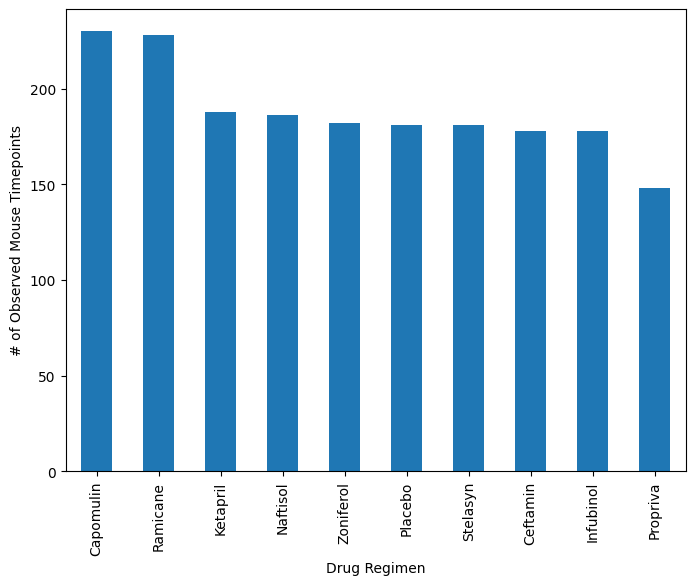

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_count=mid_tp_count.plot(kind='bar',figsize=(8,6))
drug_count.set_xlabel('Drug Regimen')
drug_count.set_ylabel('# of Observed Mouse Timepoints')
plt.show()

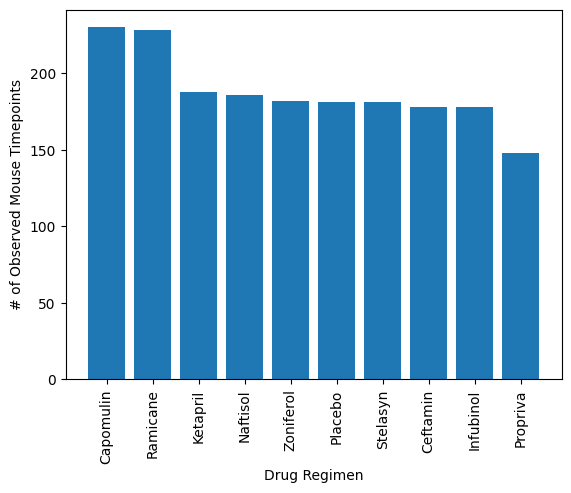

In [46]:
drug_regimen=['Capomulin','Ramicane','Ketapril','Naftisol','Zoniferol','Placebo','Stelasyn','Ceftamin','Infubinol','Propriva']
timepoint=[230,228,188,186,182,181,181,178,178,148]
plt.bar(drug_regimen,timepoint)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()


In [20]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_gp=mouse_clean2.groupby('Sex')
tot_sex=sex_gp['Mouse ID'].count().sort_values(ascending=False)
tot_sex

Sex
Male      958
Female    922
Name: Mouse ID, dtype: int64

Text(0, 0.5, 'Sex')

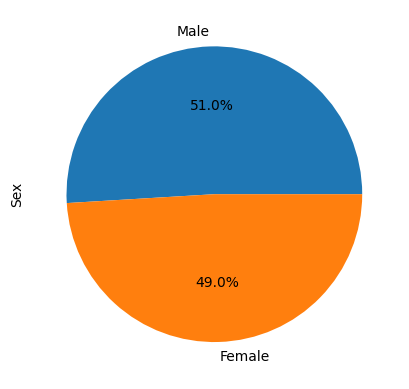

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
tot_sex_pie=tot_sex.plot(kind='pie',y='Mouse ID',autopct='%1.1f%%')
tot_sex_pie.set_ylabel('Sex')

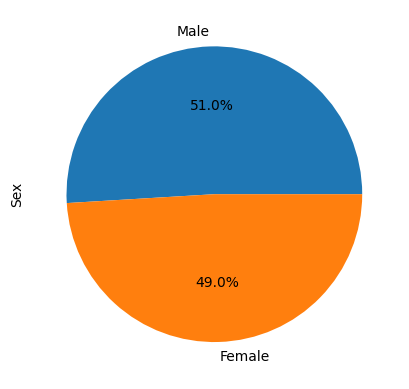

In [53]:
labels=['Male','Female']
sizes=[958,922]
plt.pie(sizes,labels=labels,autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [24]:
tp1=mouse_clean2['Timepoint'].value_counts()
tp1

0     248
5     236
10    221
15    205
20    193
25    182
30    170
35    153
40    142
45    130
Name: Timepoint, dtype: int64

In [25]:
lst_tp=mouse_clean2.groupby(['Mouse ID'])
lst_tp.head()
lst_tp1=lst_tp['Timepoint'].max()
lst_tp1

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [26]:
tp_merge=pd.merge(mouse_clean2,lst_tp1,how='left',on=['Mouse ID'])
tp_merge.head(100)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
95,u364,Capomulin,Male,18,17,0,45.000000,0,45
96,u364,Capomulin,Male,18,17,5,45.760886,1,45
97,u364,Capomulin,Male,18,17,10,46.568417,2,45
98,u364,Capomulin,Male,18,17,15,47.212200,2,45


In [27]:
clean_fintv=tp_merge.loc[tp_merge['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])]
clean_fintv
fin_tv=clean_fintv.loc[:,['Mouse ID','Drug Regimen','Tumor Volume (mm3)','Timepoint_x','Timepoint_y']]
fin_tv.head()
lrg_tp=fin_tv.loc[(fin_tv['Timepoint_y'] == fin_tv['Timepoint_x'])]
lrg_tp.head()

,Mouse ID,Drug Regimen,Tumor Volume (mm3),Timepoint_x,Timepoint_y
9,k403,Ramicane,22.050126,45,45
19,s185,Capomulin,23.343598,45,45
29,x401,Capomulin,28.484033,45,45
39,m601,Capomulin,28.430964,45,45
49,g791,Ramicane,29.128472,45,45


In [28]:
fin_ltp=lrg_tp.loc[:,['Drug Regimen','Tumor Volume (mm3)']]
fin_ltp.head()


,Drug Regimen,Tumor Volume (mm3)
9,Ramicane,22.050126
19,Capomulin,23.343598
29,Capomulin,28.484033
39,Capomulin,28.430964
49,Ramicane,29.128472


In [62]:
treatments=['Capomulin','Ramicane','Infubinol','Ceftamin']
tumor_vol_data=[]
for drug in treatments:
    final_tumor_vol= fin_ltp.loc[fin_ltp['Drug Regimen']==drug, 'Tumor Volume (mm3)']
    tumor_vol_data.append(final_tumor_vol)
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers=  final_tumor_vol.loc[(final_tumor_vol< lower_bound) | (final_tumor_vol> upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")
 

    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 669    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


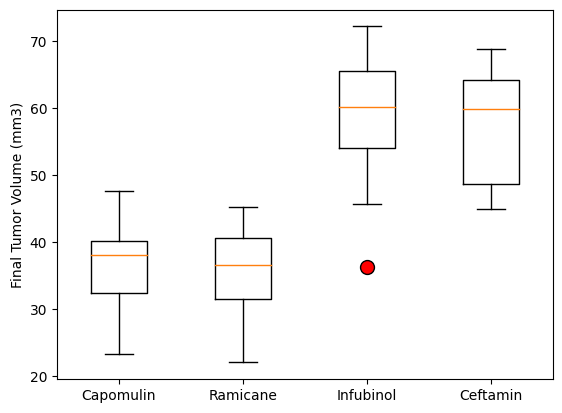

In [30]:
out1=dict(markerfacecolor='red',markersize=10)
plt.boxplot(tumor_vol_data,labels=treatments,flierprops=out1)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

In [31]:
capo=fin_ltp.loc[(fin_ltp['Drug Regimen'] == 'Capomulin')]
capo.head()

,Drug Regimen,Tumor Volume (mm3)
19,Capomulin,23.343598
29,Capomulin,28.484033
39,Capomulin,28.430964
64,Capomulin,30.485985
104,Capomulin,31.023923


In [32]:
rami=fin_ltp.loc[(fin_ltp['Drug Regimen'] == 'Ramicane')]
rami.head()

,Drug Regimen,Tumor Volume (mm3)
9,Ramicane,22.050126
49,Ramicane,29.128472
59,Ramicane,30.276232
74,Ramicane,30.564625
84,Ramicane,30.638696


In [33]:
infu=fin_ltp.loc[(fin_ltp['Drug Regimen'] == 'Infubinol')]
infu.head()

,Drug Regimen,Tumor Volume (mm3)
463,Infubinol,67.973419
473,Infubinol,65.525743
530,Infubinol,57.031862
540,Infubinol,66.083066
637,Infubinol,72.226731


In [34]:
ceft=fin_ltp.loc[(fin_ltp['Drug Regimen'] == 'Ceftamin')]
ceft.head()

,Drug Regimen,Tumor Volume (mm3)
493,Ceftamin,62.999356
594,Ceftamin,45.000000
600,Ceftamin,56.057749
617,Ceftamin,55.742829
840,Ceftamin,48.722078


In [35]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [36]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capo_1=mouse_clean2.loc[(mouse_clean2['Drug Regimen']=='Capomulin')]
capo_1.head(30)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [37]:
tv_v_tp=capo_1.loc[(capo_1['Mouse ID']=='x401')]
tv_v_tp

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
20,x401,Capomulin,Female,16,15,0,45.000000,0
21,x401,Capomulin,Female,16,15,5,45.473753,0
22,x401,Capomulin,Female,16,15,10,39.113891,0
23,x401,Capomulin,Female,16,15,15,39.776250,0
24,x401,Capomulin,Female,16,15,20,36.065835,0
25,x401,Capomulin,Female,16,15,25,36.617120,0
26,x401,Capomulin,Female,16,15,30,32.915292,0
27,x401,Capomulin,Female,16,15,35,30.206825,0
28,x401,Capomulin,Female,16,15,40,28.167397,0
29,x401,Capomulin,Female,16,15,45,28.484033,0


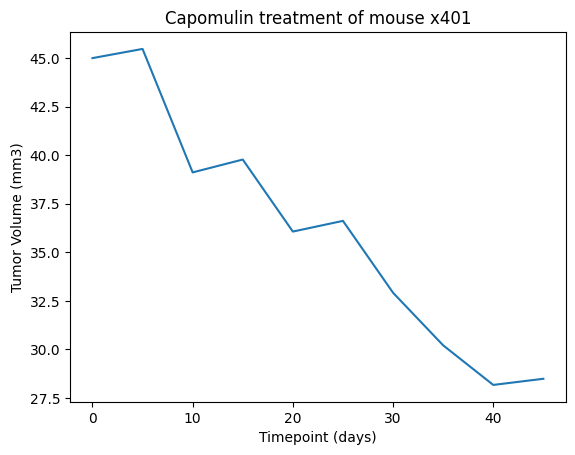

In [54]:
tv_vol=tv_v_tp.loc[:,['Tumor Volume (mm3)']]
tv_vol
tps=tv_v_tp.loc[:,['Timepoint']]
tps
tumor_volume,=plt.plot(tps,tv_vol)
plt.title('Capomulin treatment of mouse x401')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [39]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mouse_w=capo_1.groupby(['Mouse ID','Weight (g)'])
mouse_w.head()
tv_ave=mouse_w['Tumor Volume (mm3)'].mean()
tv_ave
mw_v_ave_tv=pd.DataFrame(tv_ave)
reset_mw_tv=mw_v_ave_tv.reset_index()
reset_mw_tv

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344
5,i557,24,44.805810
6,i738,20,39.141053
7,j119,23,44.465236
8,j246,21,43.216925
9,l509,21,44.434474


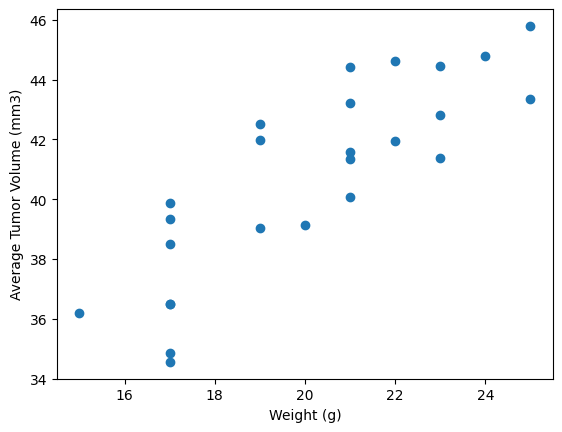

In [40]:
weight=reset_mw_tv['Weight (g)']
tum_vol=reset_mw_tv['Tumor Volume (mm3)']
plt.scatter(weight,tum_vol)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

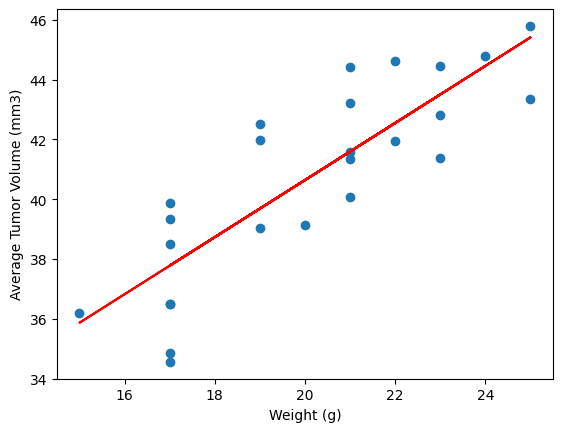

In [41]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope,intercept,rvalue,pvalue,stderr)= linregress(weight,tum_vol)
regress_val=weight * slope + intercept
plt.scatter(weight,tum_vol)
plt.plot(weight,regress_val,'r-')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

In [58]:
print(f"The correlation coefficient between mouse weight and the average tumor volume is {round(st.pearsonr(weight,tum_vol)[0],2)}")

The correlation coefficient between mouse weight and the average tumor volume is 0.84
